In [1]:
import os
from dotenv import load_dotenv
load_dotenv()
groq_api_key=os.getenv("GROQ_API_KEY")

In [2]:
model="deepseek-r1-distill-llama-70b"

In [3]:
from langchain_groq import ChatGroq
llm = ChatGroq(model=model)

In [4]:
from langchain.tools import tool

@tool
def multiply(a: int, b: int) -> int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a * b

@tool
def add(a: int, b: int) -> int:
    """
    Add two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The sum of a and b.
    """
    return a + b

@tool
def divide(a: int, b: int) -> float:
    """
    Divide two integers.

    Args:
        a (int): The numerator.
        b (int): The denominator (must not be 0).

    Returns:
        float: The result of division.
    """
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a / b

In [5]:
# Importing internel tool
from langchain_community.tools import DuckDuckGoSearchRun
search = DuckDuckGoSearchRun()

In [8]:
search.invoke("update on iphone16")

d:\Python\CODE\venv\lib\site-packages\langchain_community\utilities\duckduckgo_search.py:64: UserWarning: backend='api' is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(


'New 16 pro max is stuck on software update for 20mins. Please help [Re-Titled by Moderator] Apple has just released the iPhone 16 series. And now, just three days after the phones have gone on sale, it\'s already issued an update for all four models, iPhone 16, iPhone 16 Plus, iPhone 16 ... Click Check for Update. To install an available update, click Update. The process is virtually identical on Windows: download and install iTunes, launch it, select your device, and then hit "Check for Update" on the "General" tab. iPhone 16 Updating Troubles: Fixed! It\'s frustrating when your iPhone 16 won\'t update. New security update from Apple affects all four iPhone 16 models. Don\'t sleep on this update, install it right now. Apple\'s iPhone 16, iPhone 16 Plus, iPhone 16 Pro, and iPhone 16 Pro Max launched in markets around the world on September 20. If you\'re the new owner of one of Apple\'s latest models, then keep ...'

In [10]:
tools = [add, divide, multiply, search]

In [11]:
llm_with_tools = llm.bind_tools(tools)

In [12]:
response = llm_with_tools.invoke("hi")
response.content

'Hello! How can I assist you today?'

In [13]:
response.tool_calls

[]

In [14]:
response = llm_with_tools.invoke("what is addition of 2 and 3")
response.content

''

In [15]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 3},
  'id': 'y03nv8e1q',
  'type': 'tool_call'}]

In [6]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START

In [27]:
SYSTEM_PROMPT = "You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."

In [8]:
def function_1(state:MessagesState):
    user_question = state["messages"]
    input_question = [SYSTEM_PROMPT] + user_question
    response = llm_with_tools.invoke(input_question)
    return {
        "messages":[response]
    }

In [9]:
from langgraph.prebuilt import ToolNode, tools_condition
workflow = StateGraph(MessagesState)
workflow.add_node("llm_decision_step",function_1)
workflow.add_node("tools",ToolNode(tools))
workflow.add_edge(START,"llm_decision_step")
workflow.add_conditional_edges(
	"llm_decision_step",
    tools_condition
)
workflow.add_edge("tools","llm_decision_step")
app = workflow.compile()

NameError: name 'tools' is not defined

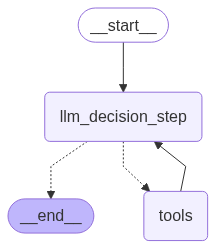

In [24]:
app

In [25]:
message=[HumanMessage(content="What is 2 times of narendramodi's age?")]

In [34]:
app.invoke({"messages":message})

d:\Python\CODE\venv\lib\site-packages\langchain_community\utilities\duckduckgo_search.py:64: UserWarning: backend='api' is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(


{'messages': [HumanMessage(content="What is 2 times of narendramodi's age?", additional_kwargs={}, response_metadata={}, id='e3f1433e-7b3c-403c-99cb-c13284ed5c2f'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '4332jhaxm', 'function': {'arguments': '{"query":"Narendra Modi age 2023"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 288, 'prompt_tokens': 423, 'total_tokens': 711, 'completion_time': 1.237375233, 'prompt_time': 0.036534374, 'queue_time': 0.057152426, 'total_time': 1.273909607}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--cbb3e960-a7de-46e9-807c-8a4f79df1681-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Narendra Modi age 2023'}, 'id': '4332jhaxm', 'type': 'tool_call'}], usage_metadata={'input_tokens': 423, 'output_tokens': 288, 'total_tokens': 711}),
  ToolMessage(content='L

In [35]:
message = [HumanMessage(content="How much is the net worth of Elon Musk, and divide it by 2?")]
app.invoke({"messages":message})

d:\Python\CODE\venv\lib\site-packages\langchain_community\utilities\duckduckgo_search.py:64: UserWarning: backend='api' is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(


{'messages': [HumanMessage(content='How much is the net worth of Elon Musk, and divide it by 2?', additional_kwargs={}, response_metadata={}, id='ee537da9-3f3c-4552-af7f-d2a04f084cfc'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'zx74rawy7', 'function': {'arguments': '{"query":"Elon Musk net worth 2023"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 266, 'prompt_tokens': 427, 'total_tokens': 693, 'completion_time': 1.037023133, 'prompt_time': 0.027346946, 'queue_time': 0.053597224, 'total_time': 1.064370079}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--548784be-b384-4851-8afc-5fcae31aa8e0-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Elon Musk net worth 2023'}, 'id': 'zx74rawy7', 'type': 'tool_call'}], usage_metadata={'input_tokens': 427, 'output_tokens': 266, 'total_tokens': 693}),

In [40]:
message = [HumanMessage(content="What is the speed of light in m/s and multiply it by 10?")]
response = app.invoke({"messages":message})

d:\Python\CODE\venv\lib\site-packages\langchain_community\utilities\duckduckgo_search.py:64: UserWarning: backend='api' is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(


In [42]:
response

{'messages': [HumanMessage(content='What is the speed of light in m/s and multiply it by 10?', additional_kwargs={}, response_metadata={}, id='62878916-9717-4b58-a7e9-50b7a9038b62'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '1w7r9bm5s', 'function': {'arguments': '{"query":"speed of light in m/s"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 338, 'prompt_tokens': 426, 'total_tokens': 764, 'completion_time': 1.3333090269999999, 'prompt_time': 0.028339045, 'queue_time': 0.052707096, 'total_time': 1.361648072}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--825e1a75-5a44-48aa-adcf-bd6541ed2bdc-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'speed of light in m/s'}, 'id': '1w7r9bm5s', 'type': 'tool_call'}], usage_metadata={'input_tokens': 426, 'output_tokens': 338, 'total_tokens': 764}),
 

In [41]:
response['messages'][-1].content

'The speed of light in meters per second is **299,792,458 m/s**. When multiplied by 10, the result is **2,997,924,580**.'

In [43]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the speed of light in m/s and multiply it by 10?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (1w7r9bm5s)
 Call ID: 1w7r9bm5s
  Args:
    query: speed of light in m/s
================================= Tool Message =================================
Name: duckduckgo_search

The speed of light in vacuum, commonly denoted c, is a universal physical constant exactly equal to 299,792,458 metres per second (approximately 300,000 kilometres per second; ... [97] fixing the value of the speed of light at 299 792 458 m/s by definition, as described below. Learn what is the speed of light in a vacuum and how it affects physics and space travel. Find out how to measure distances in light-years and what is faster than light. Speed of light, speed at which light waves propagate through different materials. In a vacuum, the speed of light is 299,

In [10]:
import yfinance as yf
@tool
def get_stock_price(ticker:str)->str:
    """
    Fetches the previous closing price of a given stock ticker from Yahoo Finance.

    Args:
        ticker (str): The stock ticker symbol (e.g., 'AAPL', 'TSLA', 'NIFTY.BO').

    Returns:
        str: A message with the stock's previous closing price.
    """
    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch price for ticker '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"

In [11]:
get_stock_price.invoke("AAPL")

'The last closing price of AAPL was $201.00.'

In [46]:
get_stock_price.invoke("TSLA")

'The last closing price of TSLA was $328.49.'

In [47]:
tools

[StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x0000027708A9F550>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x00000277061CE4C0>),
 StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x000002770A50F820>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [12]:
tools = [add, multiply, divide, search,get_stock_price]
tools

[StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x000002AC2F7FC280>),
 StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x000002AC2F7B5820>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x000002AC2F7FC310>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [13]:
llm_with_tools = llm.bind_tools(tools)

In [50]:
response=llm_with_tools.invoke("can you give me a latest stock price of adani greens?")
response.content

''

In [51]:
response.tool_calls

[{'name': 'get_stock_price',
  'args': {'ticker': 'ADANIGREN.BO'},
  'id': 'vgfeencw8',
  'type': 'tool_call'}]

In [14]:
SYSTEM_PROMPT = SystemMessage(
    content="You are a helpful assistant tasked with using search, the yahoo finance tool and performing arithmetic on a set of inputs."
)
def function_1(state:MessagesState):
    user_question=state["messages"]
    input_question = [SYSTEM_PROMPT]+user_question
    response = llm_with_tools.invoke(input_question)
    return {
        "messages":[response]
    }

In [15]:
workflow = StateGraph(MessagesState)
workflow.add_node("llm_decision_step", function_1)
workflow.add_node("tools", ToolNode(tools))
workflow.add_edge(START, "llm_decision_step")
workflow.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)
workflow.add_edge("tools", "llm_decision_step")
app2 = workflow.compile()

In [61]:
message = [HumanMessage(content="add 1000 in the current stock price of Apple.")]
response1 = app2.invoke({"messages": message})

In [62]:
for m in response1['messages']:
    m.pretty_print()

================================ Human Message =================================

add 1000 in the current stock price of Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (j3cgzg9pt)
 Call ID: j3cgzg9pt
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $201.00.
================================== Ai Message ==================================
Tool Calls:
  add (gvq52a2dj)
 Call ID: gvq52a2dj
  Args:
    a: 1000
    b: 201
================================= Tool Message =================================
Name: add

1201
================================== Ai Message ==================================

The result of adding 1000 to the current stock price of Apple is \boxed{1201}.
